#**Challenge 2**

<center><img src="https://a.ipricegroup.com/media/Abigail/Menu_McDonalds_Indonesia.jpg" width="500"/>

#<center><font color="Red">-> Clustering menggunakan data Menu MCD <-

##**Preprocessing Data**

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA 
import sklearn.metrics as sklearnm

#from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%matplotlib inline

In [ ]:
#memanggil data yang ingin digunakan
dataset = pd.read_csv('menu.csv')
dataset.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [ ]:
#mengecek apakah terdapat data yang kosong
dataset.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [ ]:
#mengecek type data yang digunakan apakah sudah sesuai dengan yang dibutuhkan
dataset.dtypes

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object

In [ ]:
# mengubah tipe data Serving Size dari Object ke float
serving_size_conv = []
for i in dataset['Serving Size']:
    if '(' in i and 'g)' in i:
        serving_size_conv.append(float(i[i.find('(')+1:-3])) 
    elif 'fl oz' in i:
        serving_size_conv.append(float(i[0:i.find(' ')])*29.5735) ## assume 1 fl oz = 29.5735 g
    elif '(' and 'ml)':
        serving_size_conv.append(float(i[i.find('(')+1:-4])*1.04) ## assume 1 ml = 1.04g

dataset['Serving Size']= pd.DataFrame(serving_size_conv).astype('float')
dataset.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,136.0,300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,135.0,250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,111.0,370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,161.0,450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,161.0,400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [ ]:
df=dataset.iloc[:,2::]
df

,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,136.0,300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,135.0,250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,111.0,370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,161.0,450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,161.0,400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,285.0,510,150,17.0,26,9.0,44,0.5,45,14,280,12,80,27,1,4,64,12,15,0,40,8
256,381.0,690,200,23.0,35,12.0,58,1.0,55,19,380,16,106,35,1,5,85,15,20,0,50,10
257,190.0,340,100,11.0,17,6.0,29,0.0,30,9,190,8,53,18,1,2,43,8,10,0,25,6
258,403.0,810,290,32.0,50,15.0,76,1.0,60,20,400,17,114,38,2,9,103,21,20,0,60,6


In [ ]:
norm_df=(df-df.min())/(df.max()-df.min())
norm_df

,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,0.116640,0.159574,0.113208,0.110169,0.109890,0.25,0.245098,0.0,0.452174,0.453125,0.208333,0.206667,0.219858,0.212766,0.571429,0.607143,0.023438,0.195402,0.058824,0.0,0.357143,0.375
1,0.115550,0.132979,0.066038,0.067797,0.065934,0.15,0.147059,0.0,0.043478,0.041667,0.213889,0.213333,0.212766,0.212766,0.571429,0.607143,0.023438,0.206897,0.035294,0.0,0.357143,0.200
2,0.089388,0.196809,0.188679,0.194915,0.192308,0.40,0.411765,0.0,0.078261,0.078125,0.216667,0.220000,0.205674,0.212766,0.571429,0.607143,0.015625,0.160920,0.047059,0.0,0.357143,0.250
3,0.143892,0.239362,0.235849,0.237288,0.236264,0.50,0.509804,0.0,0.495652,0.494792,0.238889,0.240000,0.212766,0.212766,0.571429,0.607143,0.015625,0.241379,0.088235,0.0,0.428571,0.375
4,0.143892,0.212766,0.198113,0.194915,0.192308,0.40,0.411765,0.0,0.086957,0.083333,0.244444,0.246667,0.212766,0.212766,0.571429,0.607143,0.015625,0.241379,0.035294,0.0,0.357143,0.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.279064,0.271277,0.141509,0.144068,0.142857,0.45,0.431373,0.2,0.078261,0.072917,0.077778,0.080000,0.567376,0.574468,0.142857,0.142857,0.500000,0.137931,0.088235,0.0,0.571429,0.200
256,0.383713,0.367021,0.188679,0.194915,0.192308,0.60,0.568627,0.4,0.095652,0.098958,0.105556,0.106667,0.751773,0.744681,0.142857,0.178571,0.664062,0.172414,0.117647,0.0,0.714286,0.250
257,0.175505,0.180851,0.094340,0.093220,0.093407,0.30,0.284314,0.0,0.052174,0.046875,0.052778,0.053333,0.375887,0.382979,0.142857,0.071429,0.335938,0.091954,0.058824,0.0,0.357143,0.150
258,0.407695,0.430851,0.273585,0.271186,0.274725,0.75,0.745098,0.4,0.104348,0.104167,0.111111,0.113333,0.808511,0.808511,0.285714,0.321429,0.804688,0.241379,0.117647,0.0,0.857143,0.150


##**K-Means Clustering**

<center><img src="https://miro.medium.com/max/375/1*4LOxZL6bFl3rXlr2uCiKlQ.gif" width="500"/>

In [ ]:
pca = PCA(2) 
pca.fit(norm_df) 
pca_data = pd.DataFrame(pca.transform(norm_df)) 
pca_data.rename(columns={0:'x'}, inplace=True)
pca_data.rename(columns={1:'y'}, inplace=True)
  
print(pca_data.head())

          x         y
0  0.320046 -0.545461
1  0.012628 -0.494253
2  0.320870 -0.455373
3  0.653972 -0.466688
4  0.350448 -0.449779


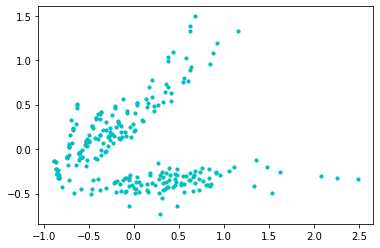

In [ ]:
#--- Memvisualkan persebaran data ---
plt.scatter(pca_data.x, pca_data.y, s =10, c = "c", marker = "o", alpha = 1)
plt.show()


#sns.scatterplot(x=pca_data.x, y=pca_data.y, data=pca_data, s=100, color="red", alpha = 0.5)

In [ ]:
#x_array =  np.array(norm_df)
#print(x_array)

In [ ]:
# Menentukan dan mengkonfigurasi fungsi kmeans
kmeans = KMeans(n_clusters = 3, random_state=123)
# Menentukan kluster dari data
#kmeans.fit(x_array)
#kmeans.fit(norm_df)
kmeans.fit(pca_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [ ]:
#print(kmeans.cluster_centers_)

# Menampilkan hasil kluster
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1
 2 2 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1
 1 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 1]


In [ ]:
# Menambahkan kolom "kluster" dalam data frame ritel
dataset["kluster"] = kmeans.labels_
databaru=dataset.iloc[:,lambda dataset:[0,1,24]]
databaru

,Category,Item,kluster
0,Breakfast,Egg McMuffin,0
1,Breakfast,Egg White Delight,0
2,Breakfast,Sausage McMuffin,0
3,Breakfast,Sausage McMuffin with Egg,0
4,Breakfast,Sausage McMuffin with Egg Whites,0
...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),2
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),2
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),1
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),2


In [ ]:
databaru.sort_values('kluster')

,Category,Item,kluster
0,Breakfast,Egg McMuffin,0
61,Chicken & Fish,Premium Crispy Chicken Ranch BLT Sandwich,0
60,Chicken & Fish,Premium Grilled Chicken Club Sandwich,0
59,Chicken & Fish,Premium Crispy Chicken Club Sandwich,0
58,Chicken & Fish,Premium Grilled Chicken Classic Sandwich,0
...,...,...,...
195,Coffee & Tea,Hot Chocolate with Nonfat Milk (Large),2
156,Coffee & Tea,Hazelnut Latte (Large),2
186,Coffee & Tea,Caramel Mocha (Large),2
228,Coffee & Tea,Frappé Caramel (Large),2


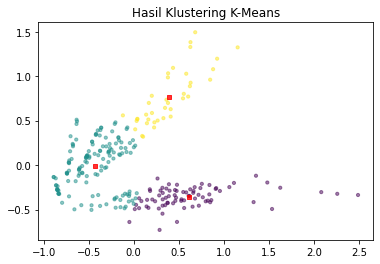

In [ ]:
#--- Memvisualkan hasil kluster ---
output = plt.scatter(pca_data.x, pca_data.y, s = 10, c = dataset.kluster, marker = "o", alpha = 0.5, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=20, alpha=0.8 , marker="s");
plt.title("Hasil Klustering K-Means")
#plt.colorbar (output)
plt.show()

In [ ]:
#mengevaluasi hasil clustering menggunakan sillhouette coefficient -> pendekatan external dan pendekatan internal 

evaluasi = sklearnm.silhouette_score(pca_data, dataset.kluster )
print(evaluasi)

0.5070887611689373


[0.4360820281706003, 0.5070887611689373, 0.49310891413990143, 0.46598390973012843, 0.46871850841981855, 0.45626686373263153, 0.4355675426500523, 0.42676010701588313]


Text(0, 0.5, 'Nilai Sillhouette')

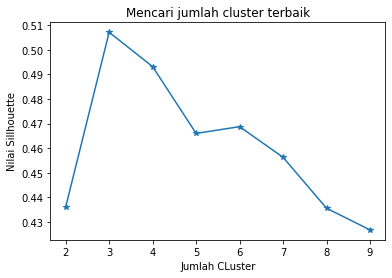

In [ ]:
evaluasitotal = []
def cekClusterOpt (cl):
  pca = PCA(2) 
  pca.fit(norm_df) 
  pca_data = pd.DataFrame(pca.transform(norm_df)) 
  pca_data.rename(columns={0:'x'}, inplace=True)
  pca_data.rename(columns={1:'y'}, inplace=True)
  kmeans = KMeans(n_clusters = cl, random_state=123)
  kmeans.fit(pca_data)
  dataset["kluster"] = kmeans.labels_
  evaluasi = sklearnm.silhouette_score(pca_data, dataset.kluster )
  evaluasitotal.append(evaluasi)

jmlcl=[]  
for c in range(2,10) :
  cekClusterOpt(c)
  jmlcl.append(c)
print(evaluasitotal)

#dfvisualisasi = pd.DataFrame({'jumlah Cluster': jmlcl, 'Nilai Sillhouette': evaluasitotal})
#print(dfvisualisasi)

#dfvisualisasi.plot(kind='line')
plt.plot(jmlcl, evaluasitotal, marker="*")
plt.title('Mencari jumlah cluster terbaik')
plt.xlabel('Jumlah CLuster')
plt.ylabel('Nilai Sillhouette')
##plt.show()


##**Agglomerative Clustering**

In [ ]:
dataset

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),kluster
0,Breakfast,Egg McMuffin,136.0,300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15,5
1,Breakfast,Egg White Delight,135.0,250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8,2
2,Breakfast,Sausage McMuffin,111.0,370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10,5
3,Breakfast,Sausage McMuffin with Egg,161.0,450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15,1
4,Breakfast,Sausage McMuffin with Egg Whites,161.0,400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),285.0,510,150,17.0,26,9.0,44,0.5,45,14,280,12,80,27,1,4,64,12,15,0,40,8,3
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),381.0,690,200,23.0,35,12.0,58,1.0,55,19,380,16,106,35,1,5,85,15,20,0,50,10,8
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),190.0,340,100,11.0,17,6.0,29,0.0,30,9,190,8,53,18,1,2,43,8,10,0,25,6,0
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),403.0,810,290,32.0,50,15.0,76,1.0,60,20,400,17,114,38,2,9,103,21,20,0,60,6,8


In [ ]:
SS_calories = dataset.iloc[:, [2, 3]].values

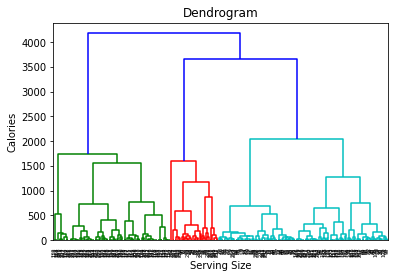

In [ ]:
#Menggunakan dendrogram untuk menentukan jumlah cluster
dendrogram = sch.dendrogram(sch.linkage(SS_calories, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Serving Size')
plt.ylabel('Calories')
plt.show()

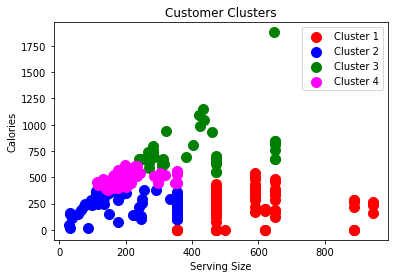

In [ ]:
#Menjalankan Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(SS_calories)

plt.scatter(SS_calories[y_hc == 0, 0], SS_calories[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(SS_calories[y_hc == 1, 0], SS_calories[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(SS_calories[y_hc == 2, 0], SS_calories[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(SS_calories[y_hc == 3, 0], SS_calories[y_hc == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.title('Customer Clusters')
plt.xlabel('Serving Size')
plt.ylabel('Calories')
plt.legend()
plt.show()

In [ ]:
SS_fat = dataset.iloc[:, [2, 5]].values

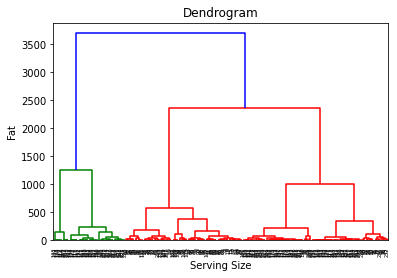

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(SS_fat, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Serving Size')
plt.ylabel('Fat')
plt.show()

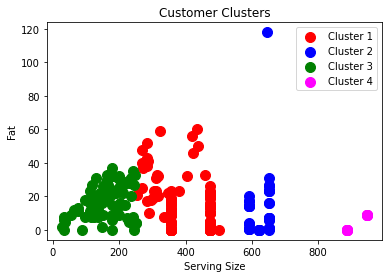

In [ ]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(SS_fat)

plt.scatter(SS_fat[y_hc == 0, 0], SS_fat[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(SS_fat[y_hc == 1, 0], SS_fat[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(SS_fat[y_hc == 2, 0], SS_fat[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(SS_fat[y_hc == 3, 0], SS_fat[y_hc == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.title('Customer Clusters')
plt.xlabel('Serving Size')
plt.ylabel('Fat')
plt.legend()
plt.show()